In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
df = pd.read_csv('./../CSVs/battery-manufacturing.csv')
df

,WKT,name,description
0,POINT (-117.5343363 33.8795296),"US Battery Manufacturing Co,",NaN
1,POINT (-90.44327229999999 38.7161681),"Electro Battery Manufacturing Co,",NaN
2,POINT (-86.9193055 38.9043626),"Battery Innovation Center, Inc.,",NaN
3,POINT (-85.8845077 37.5883111),"BlueOvalSK Battery Park,",NaN
4,POINT (-84.9891901 37.0669259),"Superior Battery Manufacturing Company, Inc.,",NaN
5,POINT (-82.123291 33.54465479999999),"US Battery Mfg Co,",NaN
6,POINT (-82.0072474 33.37056),"US Battery Manufacturing Co,",NaN
7,POINT (-79.6403983 35.8924702),"Toyota Battery Manufacturing,",NaN
8,POINT (-84.259261 39.5690389),"American Battery Solutions, Inc.,",NaN
9,POINT (-122.6178412 45.3981271),"Battery Factory,",NaN


In [4]:
df[['lon', 'lat']] = df['WKT'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)').astype(float)
df

,WKT,name,description,lon,lat
0,POINT (-117.5343363 33.8795296),"US Battery Manufacturing Co,",NaN,-117.534336,33.879530
1,POINT (-90.44327229999999 38.7161681),"Electro Battery Manufacturing Co,",NaN,-90.443272,38.716168
2,POINT (-86.9193055 38.9043626),"Battery Innovation Center, Inc.,",NaN,-86.919305,38.904363
3,POINT (-85.8845077 37.5883111),"BlueOvalSK Battery Park,",NaN,-85.884508,37.588311
4,POINT (-84.9891901 37.0669259),"Superior Battery Manufacturing Company, Inc.,",NaN,-84.989190,37.066926
5,POINT (-82.123291 33.54465479999999),"US Battery Mfg Co,",NaN,-82.123291,33.544655
6,POINT (-82.0072474 33.37056),"US Battery Manufacturing Co,",NaN,-82.007247,33.370560
7,POINT (-79.6403983 35.8924702),"Toyota Battery Manufacturing,",NaN,-79.640398,35.892470
8,POINT (-84.259261 39.5690389),"American Battery Solutions, Inc.,",NaN,-84.259261,39.569039
9,POINT (-122.6178412 45.3981271),"Battery Factory,",NaN,-122.617841,45.398127


In [5]:
X = df[['lat', 'lon']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
k_values = range(2, 9)
silhouette_scores = []

In [7]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

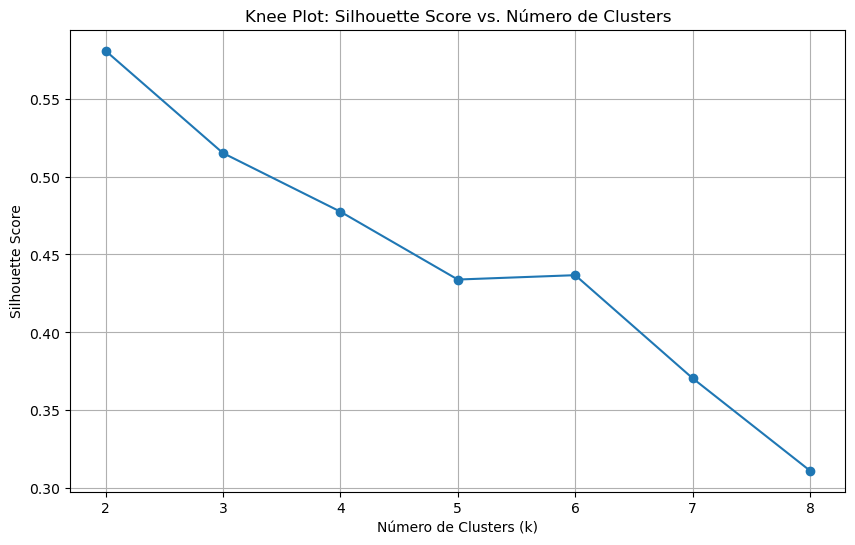

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.5817


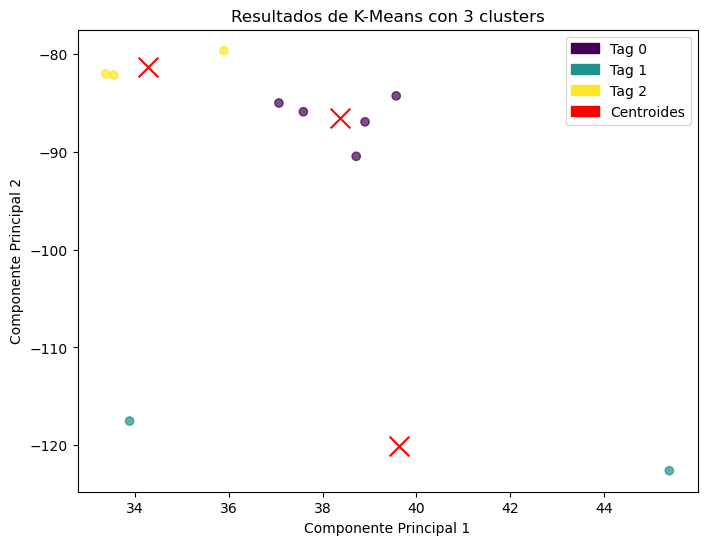

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4561


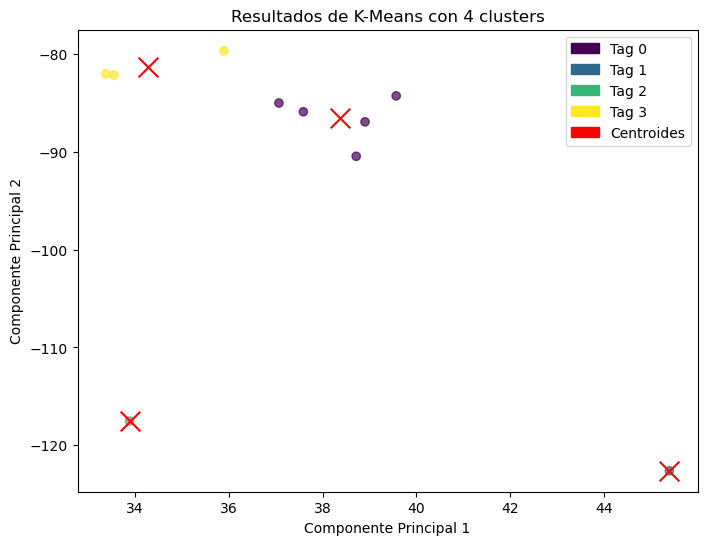

c:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.3966


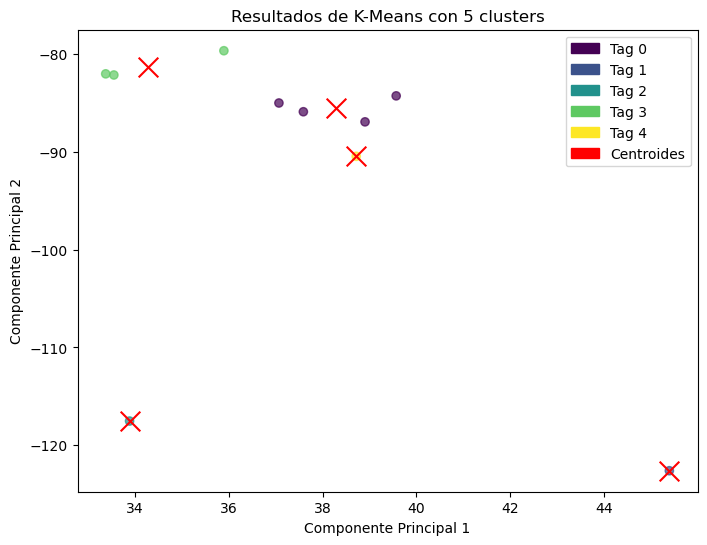

In [9]:
for j in range(3,6):
    kmeans = KMeans(n_clusters=j, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
    
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
    else:
        X_pca = X.values
        
    unique_labels = np.unique(cluster_labels)
    colors = [plt.cm.viridis(i / (len(unique_labels) - 1)) for i in range(len(unique_labels))]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')

    legend_patches = [mpatches.Patch(color=colors[i], label=f'Tag {unique_labels[i]}') for i in range(len(unique_labels))]
    plt.legend(handles=legend_patches + [mpatches.Patch(color='red', label='Centroides')])

    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Resultados de K-Means con {j} clusters")

    plt.show()